In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import matplotlib.ticker as mtick

#Upload from csv
data_set_path = "school_attendance.csv"
all_students_path = "all_students_df.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)
all_students_df = pd.read_csv(all_students_path)

all_students_df.head()


,Unnamed: 0,District name,2021-2022 attendance rate - year to date,2020-2021 attendance rate,2019-2020 attendance rate
0,0,Connecticut,0.9169,0.9294,0.9479
1,13,Andover School District,0.9386,0.9680,0.9502
2,19,Ansonia School District,0.9045,0.8923,0.9413
3,31,Ashford School District,0.9309,0.9550,0.9585
4,40,Avon School District,0.9457,0.9621,0.9583


In [2]:
#Delete unnecessary columns
del all_students_df["Unnamed: 0"]
all_students_df


,District name,2021-2022 attendance rate - year to date,2020-2021 attendance rate,2019-2020 attendance rate
0,Connecticut,0.9169,0.9294,0.9479
1,Andover School District,0.9386,0.9680,0.9502
2,Ansonia School District,0.9045,0.8923,0.9413
3,Ashford School District,0.9309,0.9550,0.9585
4,Avon School District,0.9457,0.9621,0.9583
...,...,...,...,...
196,Unified School District #2,0.9202,0.9602,0.9564
197,Connecticut Technical Education and Career System,0.8985,0.9321,0.9480
198,Norwich Free Academy District,0.8940,0.9000,0.9319
199,The Gilbert School District,0.8901,0.9458,0.9394


In [3]:
#Check for counts
all_students_df.count()

District name                               201
2021-2022 attendance rate - year to date    201
2020-2021 attendance rate                   200
2019-2020 attendance rate                   200
dtype: int64

In [4]:
#Drop Null Values
all_students_new_df = all_students_df.dropna(how="any")
all_students_new_df.count()

District name                               200
2021-2022 attendance rate - year to date    200
2020-2021 attendance rate                   200
2019-2020 attendance rate                   200
dtype: int64

In [5]:
all_students_new_df.describe()

,2021-2022 attendance rate - year to date,2020-2021 attendance rate,2019-2020 attendance rate
count,200.000000,200.000000,200.000000
mean,0.924749,0.939221,0.951207
std,0.026291,0.037230,0.012376
min,0.778500,0.772900,0.869600
25%,0.913525,0.926250,0.945925
50%,0.931600,0.951250,0.953500
75%,0.942025,0.964325,0.958025
max,0.959600,0.981100,0.999600


In [6]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020 = all_students_new_df["2019-2020 attendance rate"]
rates_2021 = all_students_new_df["2020-2021 attendance rate"]
rates_2022 = all_students_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020, rates_2021, rates_2022]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9459249999999999
The upper quartile is 0.9580249999999999
The median is: 0.9535
The IQR is: 0.0121

Lower Bound: 0.9277749999999999
Upper Bound: 0.9761749999999999

The max value is: 0.9996
The min value is: 0.8696
-----------------------------
The lower quartile is: 0.92625
The upper quartile is 0.9643250000000001
The median is: 0.95125
The IQR is: 0.03807500000000008

Lower Bound: 0.8691374999999999
Upper Bound: 1.0214375000000002

The max value is: 0.9811
The min value is: 0.7729
-----------------------------
The lower quartile is: 0.9135249999999999
The upper quartile is 0.942025
The median is: 0.9316
The IQR is: 0.02850000000000008

Lower Bound: 0.8707749999999999
Upper Bound: 0.9847750000000002

The max value is: 0.9596
The min value is: 0.7785
-----------------------------


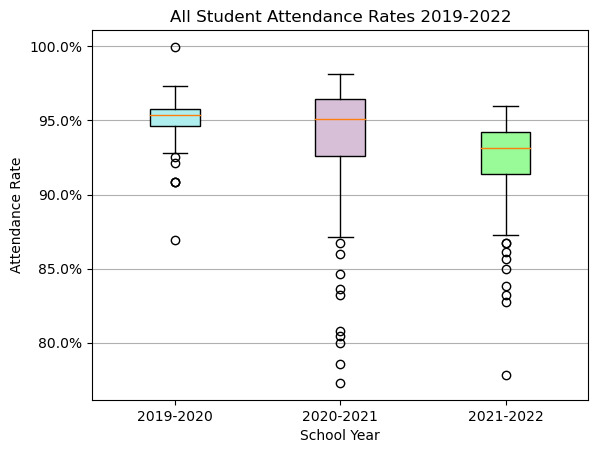

In [7]:
#All students attendance rates plot
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020, rates_2021, rates_2022]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_all = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["paleturquoise", "thistle", "palegreen"]
for patch, color in zip(bp_all['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("All Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/AllStudentsBoxPlot.png")

plt.show()

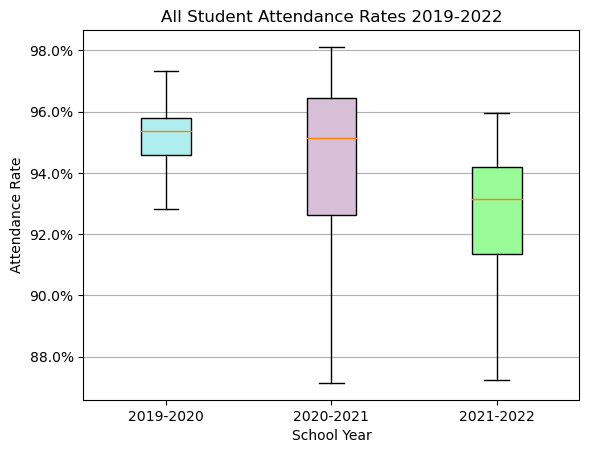

In [9]:
#Plot without outliers

labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020, rates_2021, rates_2022]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_all = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["paleturquoise", "thistle", "palegreen"]
for patch, color in zip(bp_all['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("All Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/AllStudentsNoOutBoxPlot.png")

plt.show()

In [10]:
#Filter results based on Free and Reduced Meals
fr_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Free/Reduced Price Meal Eligible"]
#Make new data frame
fr_attendance_df = fr_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
fr_attendance_df.count()

District name                               197
2019-2020 attendance rate                   194
2020-2021 attendance rate                   193
2021-2022 attendance rate - year to date    197
dtype: int64

In [11]:
#Remove Null Values and test count
fr_attendance_new_df = fr_attendance_df.dropna(how="any")
fr_attendance_new_df.count()

District name                               191
2019-2020 attendance rate                   191
2020-2021 attendance rate                   191
2021-2022 attendance rate - year to date    191
dtype: int64

In [12]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_fr = fr_attendance_new_df["2019-2020 attendance rate"]
rates_2021_fr = fr_attendance_new_df["2020-2021 attendance rate"]
rates_2022_fr = fr_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_fr, rates_2021_fr, rates_2022_fr]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.93485
The upper quartile is 0.94885
The median is: 0.9428
The IQR is: 0.014000000000000012

Lower Bound: 0.9138499999999999
Upper Bound: 0.96985

The max value is: 0.9991
The min value is: 0.8196
-----------------------------
The lower quartile is: 0.89905
The upper quartile is 0.9449000000000001
The median is: 0.9267
The IQR is: 0.04585000000000006

Lower Bound: 0.8302749999999999
Upper Bound: 1.013675

The max value is: 0.9774
The min value is: 0.6882
-----------------------------
The lower quartile is: 0.8994
The upper quartile is 0.9264
The median is: 0.9133
The IQR is: 0.027000000000000024

Lower Bound: 0.8589
Upper Bound: 0.9669000000000001

The max value is: 0.9541
The min value is: 0.7254
-----------------------------


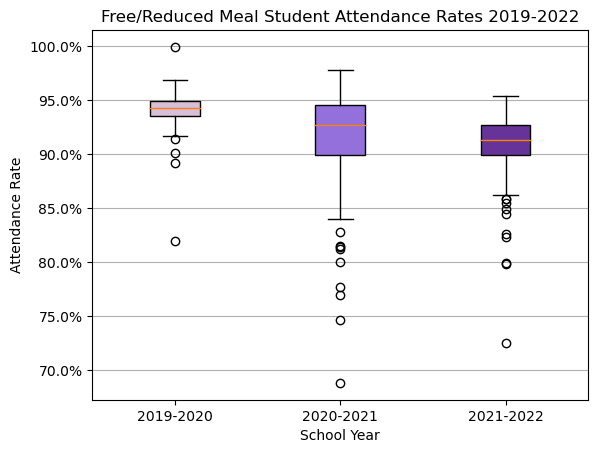

In [13]:
#Plot FR Lunch attendance rates
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_fr, rates_2021_fr, rates_2022_fr]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_fr = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["thistle", "mediumpurple", "rebeccapurple"]
for patch, color in zip(bp_fr['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Free/Reduced Meal Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/FRBoxPlot.png")

plt.show()

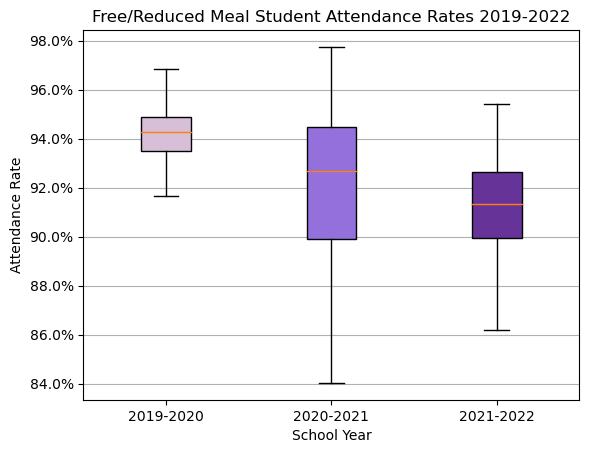

In [14]:
#Plot FR Lunch attendance rates
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_fr, rates_2021_fr, rates_2022_fr]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_fr = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["thistle", "mediumpurple", "rebeccapurple"]
for patch, color in zip(bp_fr['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Free/Reduced Meal Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/FRNoOutBoxPlot.png")

plt.show()

In [15]:
#Filter results based on English Language Learners
ell_attendance_df = data_set_df.loc[data_set_df["Student group"]=="English Learners"]
#Make new data frame
ell_attendance_df = ell_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
ell_attendance_df.count()

District name                               117
2019-2020 attendance rate                   112
2020-2021 attendance rate                   112
2021-2022 attendance rate - year to date    117
dtype: int64

In [16]:
#Remove Null Values and test count
ell_attendance_new_df = ell_attendance_df.dropna(how="any")
ell_attendance_new_df.count()

District name                               112
2019-2020 attendance rate                   112
2020-2021 attendance rate                   112
2021-2022 attendance rate - year to date    112
dtype: int64

In [17]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_ell = ell_attendance_new_df["2019-2020 attendance rate"]
rates_2021_ell = ell_attendance_new_df["2020-2021 attendance rate"]
rates_2022_ell = ell_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_ell, rates_2021_ell, rates_2022_ell]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9408749999999999
The upper quartile is 0.9578249999999999
The median is: 0.95025
The IQR is: 0.01695000000000002

Lower Bound: 0.9154499999999999
Upper Bound: 0.98325

The max value is: 0.9994
The min value is: 0.9003
-----------------------------
The lower quartile is: 0.898825
The upper quartile is 0.9571999999999999
The median is: 0.9380999999999999
The IQR is: 0.058374999999999955

Lower Bound: 0.8112625
Upper Bound: 1.0447624999999998

The max value is: 0.9788
The min value is: 0.7901
-----------------------------
The lower quartile is: 0.9072749999999999
The upper quartile is 0.939175
The median is: 0.92445
The IQR is: 0.03190000000000004

Lower Bound: 0.8594249999999999
Upper Bound: 0.987025

The max value is: 0.962
The min value is: 0.8423
-----------------------------


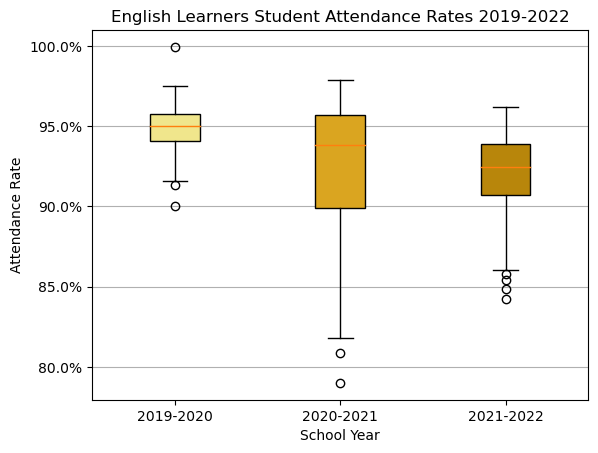

In [18]:
#Ell Plot
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_ell, rates_2021_ell, rates_2022_ell]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_ell = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["khaki", "goldenrod", "darkgoldenrod"]
for patch, color in zip(bp_ell['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("English Learners Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/ELLBoxPlot.png")
plt.show()

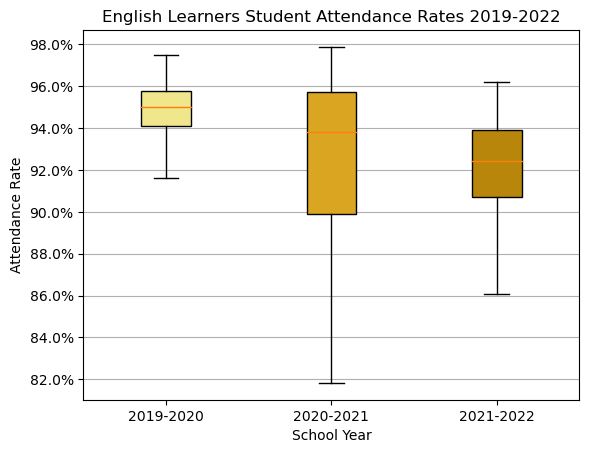

In [19]:
#Ell no outliers
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_ell, rates_2021_ell, rates_2022_ell]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_ell = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["khaki", "goldenrod", "darkgoldenrod"]
for patch, color in zip(bp_ell['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("English Learners Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/ELLNoOutBoxPlot.png")
plt.show()

In [20]:
#Filter results based on Students with Disabilities
dis_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Students With Disabilities"]
#Make new data frame
dis_attendance_df = dis_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
dis_attendance_df.count()

District name                               190
2019-2020 attendance rate                   184
2020-2021 attendance rate                   184
2021-2022 attendance rate - year to date    190
dtype: int64

In [21]:
#Remove Null Values and test count
dis_attendance_new_df = dis_attendance_df.dropna(how="any")
dis_attendance_new_df.count()

District name                               184
2019-2020 attendance rate                   184
2020-2021 attendance rate                   184
2021-2022 attendance rate - year to date    184
dtype: int64

In [22]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_dis = dis_attendance_new_df["2019-2020 attendance rate"]
rates_2021_dis = dis_attendance_new_df["2020-2021 attendance rate"]
rates_2022_dis = dis_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_dis, rates_2021_dis, rates_2022_dis]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9274
The upper quartile is 0.946825
The median is: 0.9393
The IQR is: 0.019425000000000026

Lower Bound: 0.8982625
Upper Bound: 0.9759625000000001

The max value is: 0.9993
The min value is: 0.8701
-----------------------------
The lower quartile is: 0.896725
The upper quartile is 0.9467
The median is: 0.92865
The IQR is: 0.04997499999999999

Lower Bound: 0.8217625
Upper Bound: 1.0216625

The max value is: 0.9819
The min value is: 0.7498
-----------------------------
The lower quartile is: 0.890775
The upper quartile is 0.92655
The median is: 0.9124
The IQR is: 0.035775

Lower Bound: 0.8371124999999999
Upper Bound: 0.9802124999999999

The max value is: 0.9576
The min value is: 0.7911
-----------------------------


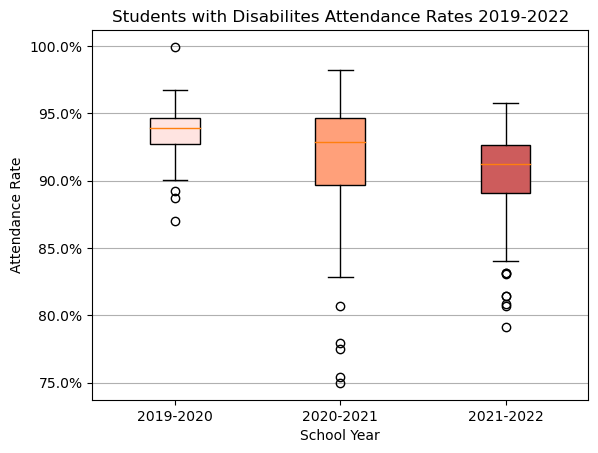

In [23]:
#Disabilities Plot
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_dis, rates_2021_dis, rates_2022_dis]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_dis = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["mistyrose", "lightsalmon", "indianred"]
for patch, color in zip(bp_dis['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with Disabilites Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/DISBoxPlot.png")
plt.show()

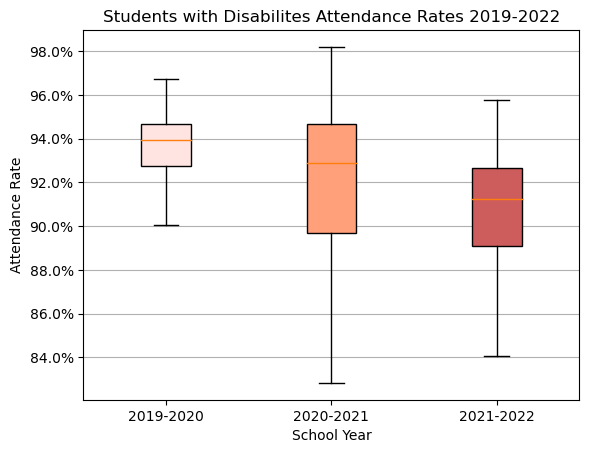

In [24]:
#Disabilities No Outliers
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_dis, rates_2021_dis, rates_2022_dis]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_dis = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["mistyrose", "lightsalmon", "indianred"]
for patch, color in zip(bp_dis['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with Disabilites Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
plt.savefig("Images/DISNoOutBoxPlot.png")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.show()

In [25]:
#Filter results based on Students with High Needs
needs_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Students With High Needs"]
#Make new data frame
needs_attendance_df = needs_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
needs_attendance_df.count()

District name                               197
2019-2020 attendance rate                   195
2020-2021 attendance rate                   195
2021-2022 attendance rate - year to date    197
dtype: int64

In [26]:
#Remove Null Values and test count
needs_attendance_new_df = needs_attendance_df.dropna(how="any")
needs_attendance_new_df.count()

District name                               195
2019-2020 attendance rate                   195
2020-2021 attendance rate                   195
2021-2022 attendance rate - year to date    195
dtype: int64

In [27]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_needs = needs_attendance_new_df["2019-2020 attendance rate"]
rates_2021_needs = needs_attendance_new_df["2020-2021 attendance rate"]
rates_2022_needs = needs_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_needs, rates_2021_needs, rates_2022_needs]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9371
The upper quartile is 0.9498
The median is: 0.9446
The IQR is: 0.012699999999999934

Lower Bound: 0.9180500000000001
Upper Bound: 0.9688499999999999

The max value is: 0.9994
The min value is: 0.9001
-----------------------------
The lower quartile is: 0.9067000000000001
The upper quartile is 0.9494
The median is: 0.9336
The IQR is: 0.04269999999999996

Lower Bound: 0.8426500000000001
Upper Bound: 1.01345

The max value is: 0.979
The min value is: 0.754
-----------------------------
The lower quartile is: 0.903
The upper quartile is 0.9286
The median is: 0.9178
The IQR is: 0.025599999999999956

Lower Bound: 0.8646
Upper Bound: 0.9669999999999999

The max value is: 0.9537
The min value is: 0.8102
-----------------------------


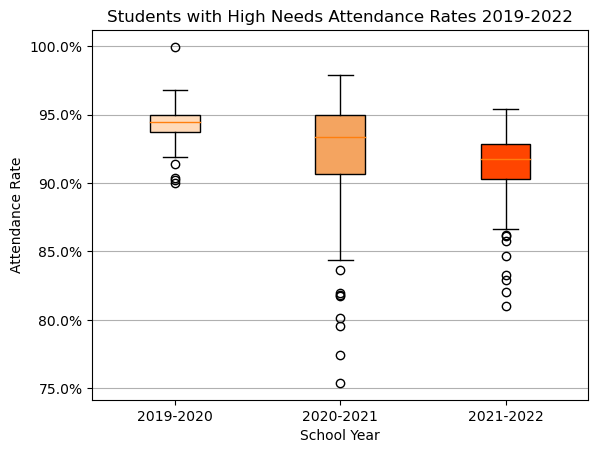

In [28]:
#High Needs Plot
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_needs, rates_2021_needs, rates_2022_needs]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_needs = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["peachpuff", "sandybrown", "orangered"]
for patch, color in zip(bp_needs['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with High Needs Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/NeedsBoxPlot.png")
plt.show()

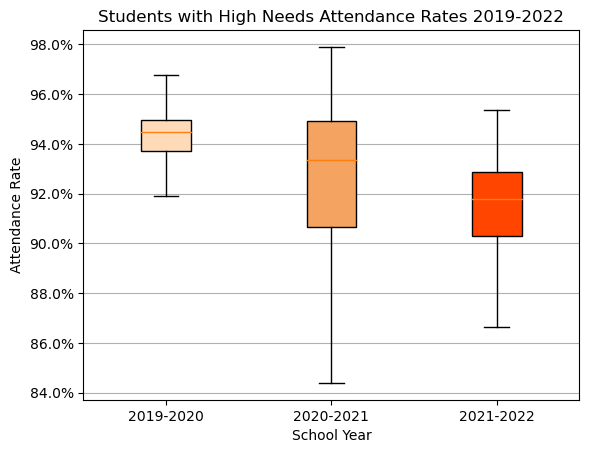

In [29]:
#High Needs No Outliers
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_needs, rates_2021_needs, rates_2022_needs]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_needs = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["peachpuff", "sandybrown", "orangered"]
for patch, color in zip(bp_needs['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with High Needs Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/NeedsNoOutBoxPlot.png")
plt.show()

In [30]:
#Filter results based on Students with High Needs
black_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Black or African American"]
#Make new data frame
black_attendance_df = black_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
black_attendance_df.count()

District name                               128
2019-2020 attendance rate                   122
2020-2021 attendance rate                   123
2021-2022 attendance rate - year to date    128
dtype: int64

In [31]:
#Remove Null Values and test count
black_attendance_new_df = black_attendance_df.dropna(how="any")
black_attendance_new_df.count()

District name                               122
2019-2020 attendance rate                   122
2020-2021 attendance rate                   122
2021-2022 attendance rate - year to date    122
dtype: int64

In [32]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_black = black_attendance_new_df["2019-2020 attendance rate"]
rates_2021_black = black_attendance_new_df["2020-2021 attendance rate"]
rates_2022_black = black_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_black, rates_2021_black, rates_2022_black]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.943125
The upper quartile is 0.9596
The median is: 0.95095
The IQR is: 0.016475000000000017

Lower Bound: 0.9184125
Upper Bound: 0.9843125

The max value is: 0.9989
The min value is: 0.9099
-----------------------------
The lower quartile is: 0.9011
The upper quartile is 0.946725
The median is: 0.93005
The IQR is: 0.04562500000000003

Lower Bound: 0.8326625
Upper Bound: 1.0151625000000002

The max value is: 0.9798
The min value is: 0.7805
-----------------------------
The lower quartile is: 0.902475
The upper quartile is 0.93875
The median is: 0.9242
The IQR is: 0.036274999999999946

Lower Bound: 0.8480625000000002
Upper Bound: 0.9931625

The max value is: 0.9625
The min value is: 0.8205
-----------------------------


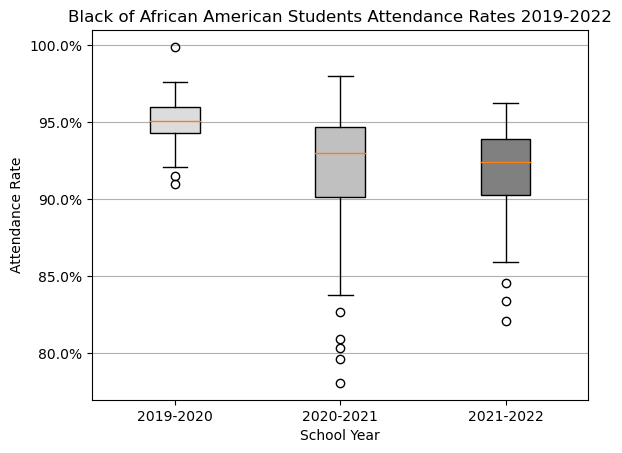

In [33]:
#Black Plot
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_black, rates_2021_black, rates_2022_black]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_black = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["gainsboro", "silver", "grey"]
for patch, color in zip(bp_black['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Black of African American Students Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/BlackBoxPlot.png")
plt.show()

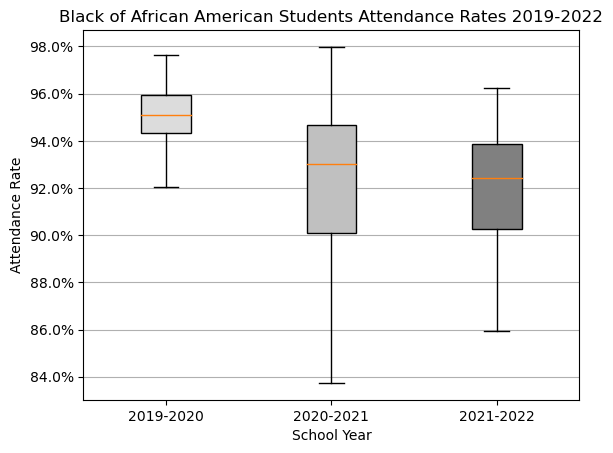

In [34]:
#Black Plot No Outliers
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_black, rates_2021_black, rates_2022_black]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_black = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["gainsboro", "silver", "grey"]
for patch, color in zip(bp_black['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Black of African American Students Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/BlackNoOutBoxPlot.png")
plt.show()

In [35]:
#Filter results based on Students with High Needs
his_attendance_df = data_set_df.loc[data_set_df["Student group"]=="Hispanic/Latino of any race"]
#Make new data frame
his_attendance_df = his_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
his_attendance_df.count()

District name                               168
2019-2020 attendance rate                   153
2020-2021 attendance rate                   159
2021-2022 attendance rate - year to date    168
dtype: int64

In [36]:
#Remove Null Values and test count
his_attendance_new_df = his_attendance_df.dropna(how="any")
his_attendance_new_df.count()

District name                               151
2019-2020 attendance rate                   151
2020-2021 attendance rate                   151
2021-2022 attendance rate - year to date    151
dtype: int64

In [37]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_his = his_attendance_new_df["2019-2020 attendance rate"]
rates_2021_his = his_attendance_new_df["2020-2021 attendance rate"]
rates_2022_his = his_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_his, rates_2021_his, rates_2022_his]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9365
The upper quartile is 0.9518
The median is: 0.9466
The IQR is: 0.01529999999999998

Lower Bound: 0.9135500000000001
Upper Bound: 0.97475

The max value is: 0.9991
The min value is: 0.8879
-----------------------------
The lower quartile is: 0.8996999999999999
The upper quartile is 0.9477
The median is: 0.9301
The IQR is: 0.04800000000000004

Lower Bound: 0.8276999999999999
Upper Bound: 1.0197

The max value is: 0.983
The min value is: 0.7369
-----------------------------
The lower quartile is: 0.8986000000000001
The upper quartile is 0.9317
The median is: 0.9156
The IQR is: 0.03309999999999991

Lower Bound: 0.8489500000000002
Upper Bound: 0.9813499999999998

The max value is: 0.9578
The min value is: 0.8038
-----------------------------


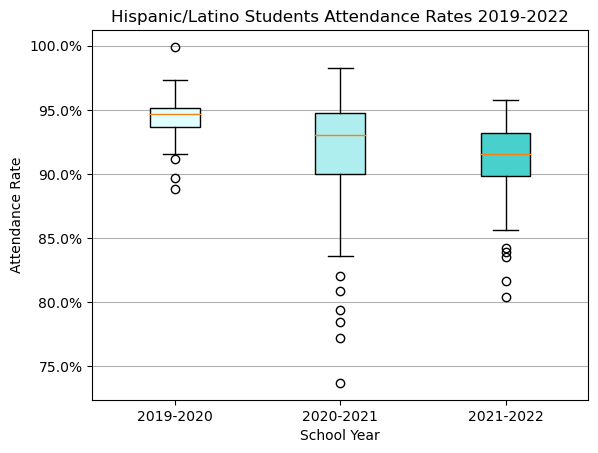

In [38]:
#His/Lat Plot
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_his, rates_2021_his, rates_2022_his]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_his = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["lightcyan", "paleturquoise", "mediumturquoise"]
for patch, color in zip(bp_his['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Hispanic/Latino Students Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/HisBoxPlot.png")
plt.show()

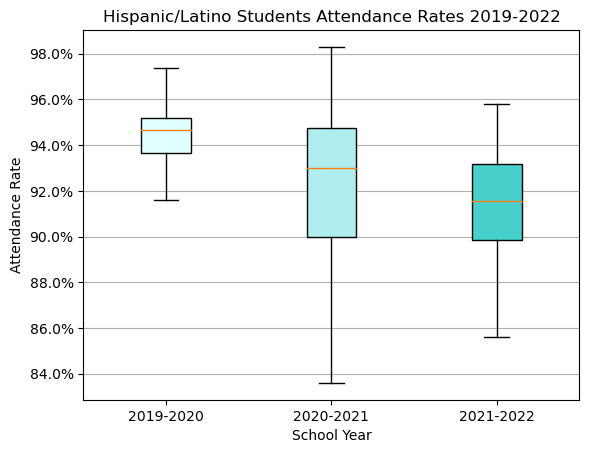

In [39]:
#His/Lat No Outliers
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_his, rates_2021_his, rates_2022_his]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_his = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["lightcyan", "paleturquoise", "mediumturquoise"]
for patch, color in zip(bp_his['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Hispanic/Latino Students Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/HisNoOutBoxPlot.png")
plt.show()

In [40]:
#Filter results based on Students with High Needs
white_attendance_df = data_set_df.loc[data_set_df["Student group"]=="White"]
#Make new data frame
white_attendance_df = white_attendance_df[["District name", "2019-2020 attendance rate", "2020-2021 attendance rate", "2021-2022 attendance rate - year to date"]]
#Test Counts
white_attendance_df.count()

District name                               182
2019-2020 attendance rate                   179
2020-2021 attendance rate                   180
2021-2022 attendance rate - year to date    182
dtype: int64

In [41]:
#Remove Null Values and test count
white_attendance_new_df = white_attendance_df.dropna(how="any")
white_attendance_new_df.count()

District name                               179
2019-2020 attendance rate                   179
2020-2021 attendance rate                   179
2021-2022 attendance rate - year to date    179
dtype: int64

In [42]:
#Statistical Analysis Attendance Rates
#Assign Variables for each school year
rates_2020_white = white_attendance_new_df["2019-2020 attendance rate"]
rates_2021_white = white_attendance_new_df["2020-2021 attendance rate"]
rates_2022_white = white_attendance_new_df["2021-2022 attendance rate - year to date"]

rates = [rates_2020_white, rates_2021_white, rates_2022_white]
for item in rates:
    quartiles = item.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is {upperq}")
    print(f"The median is: {quartiles[0.5]}")
    print(f"The IQR is: {iqr}")
    print("")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("")

    print(f"The max value is: {item.max()}")
    print(f"The min value is: {item.min()}")
    print("-----------------------------")

The lower quartile is: 0.9479
The upper quartile is 0.9577
The median is: 0.9536
The IQR is: 0.009800000000000031

Lower Bound: 0.9331999999999999
Upper Bound: 0.9724

The max value is: 0.9998
The min value is: 0.9043
-----------------------------
The lower quartile is: 0.9379500000000001
The upper quartile is 0.96565
The median is: 0.955
The IQR is: 0.027699999999999947

Lower Bound: 0.8964000000000001
Upper Bound: 1.0071999999999999

The max value is: 0.9806
The min value is: 0.8025
-----------------------------
The lower quartile is: 0.9201
The upper quartile is 0.9443
The median is: 0.9353
The IQR is: 0.0242

Lower Bound: 0.8838
Upper Bound: 0.9806

The max value is: 0.9596
The min value is: 0.7826
-----------------------------


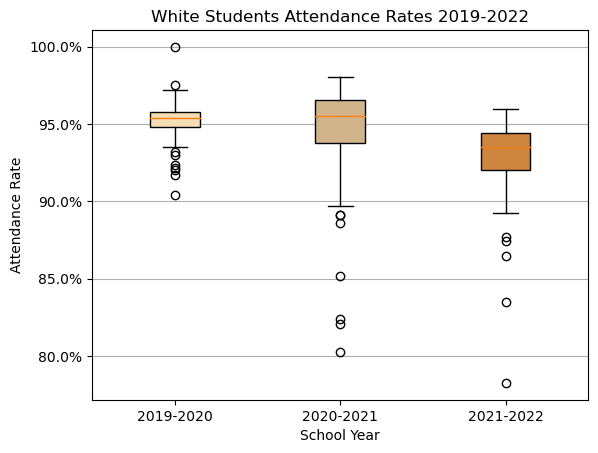

In [43]:
#White Plot
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_white, rates_2021_white, rates_2022_white]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["wheat", "tan", "peru"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("White Students Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/WhiteBoxPlot.png")
plt.show()

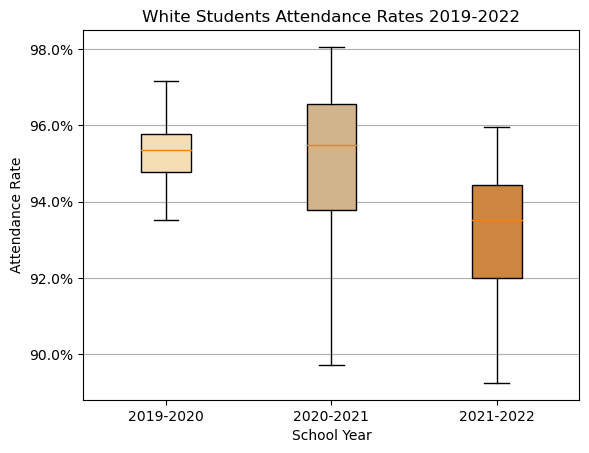

In [44]:
#White Plot No Outliers
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020_white, rates_2021_white, rates_2022_white]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["wheat", "tan", "peru"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("White Students Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/WhiteNoOutBoxPlot.png")
plt.show()

In [45]:
#Compare races
#White
rates_2020_white = white_attendance_new_df["2019-2020 attendance rate"]
rates_2021_white = white_attendance_new_df["2020-2021 attendance rate"]
rates_2022_white = white_attendance_new_df["2021-2022 attendance rate - year to date"]

#Black
rates_2020_black = black_attendance_new_df["2019-2020 attendance rate"]
rates_2021_black = black_attendance_new_df["2020-2021 attendance rate"]
rates_2022_black = black_attendance_new_df["2021-2022 attendance rate - year to date"]

#Hispanic
rates_2020_his = his_attendance_new_df["2019-2020 attendance rate"]
rates_2021_his = his_attendance_new_df["2020-2021 attendance rate"]
rates_2022_his = his_attendance_new_df["2021-2022 attendance rate - year to date"]

#All
rates_2020 = all_students_new_df["2019-2020 attendance rate"]
rates_2021 = all_students_new_df["2020-2021 attendance rate"]
rates_2022 = all_students_new_df["2021-2022 attendance rate - year to date"]

#FR Meals
rates_2020_fr = fr_attendance_new_df["2019-2020 attendance rate"]
rates_2021_fr = fr_attendance_new_df["2020-2021 attendance rate"]
rates_2022_fr = fr_attendance_new_df["2021-2022 attendance rate - year to date"]

#ELL
rates_2020_ell = ell_attendance_new_df["2019-2020 attendance rate"]
rates_2021_ell = ell_attendance_new_df["2020-2021 attendance rate"]
rates_2022_ell = ell_attendance_new_df["2021-2022 attendance rate - year to date"]


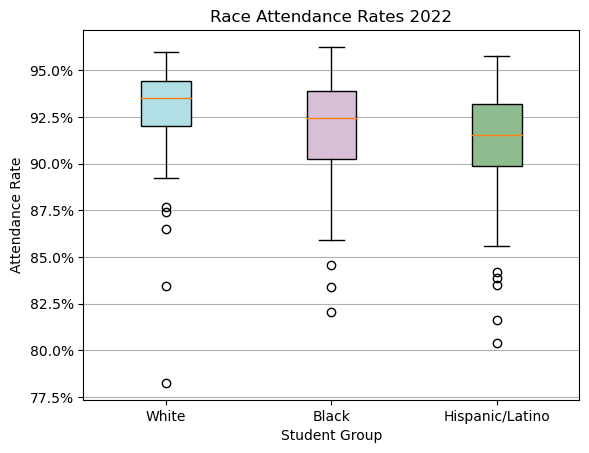

In [46]:
#Compare Races Plot
labels = ["White", "Black", "Hispanic/Latino"]
#Plot
x_axis = [rates_2022_white, rates_2022_black, rates_2022_his]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["powderblue", "thistle", "darkseagreen"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Race Attendance Rates 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/RacesBoxPlot.png")
plt.show()

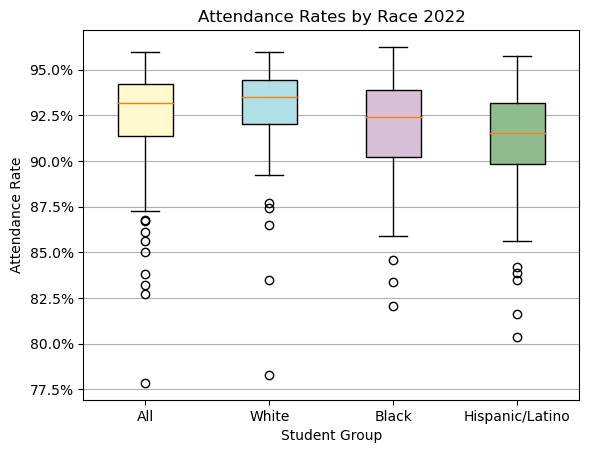

In [47]:
#Compare Races Plot
labels = ["All", "White", "Black", "Hispanic/Latino"]
#Plot
x_axis = [rates_2022, rates_2022_white, rates_2022_black, rates_2022_his]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["lemonchiffon", "powderblue", "thistle", "darkseagreen"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Attendance Rates by Race 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/RacesBoxPlot.png")
plt.show()

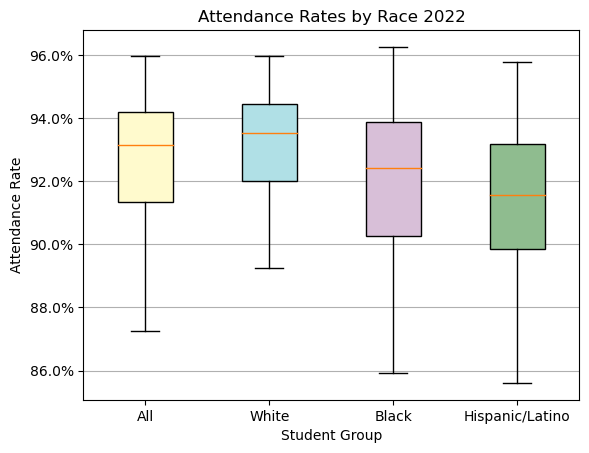

In [48]:
#Compare Races Plot No Outliers
labels = ["All", "White", "Black", "Hispanic/Latino"]
#Plot
x_axis = [rates_2022, rates_2022_white, rates_2022_black, rates_2022_his]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["lemonchiffon", "powderblue", "thistle", "darkseagreen"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Attendance Rates by Race 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/RacesNoOutBoxPlot.png")
plt.show()

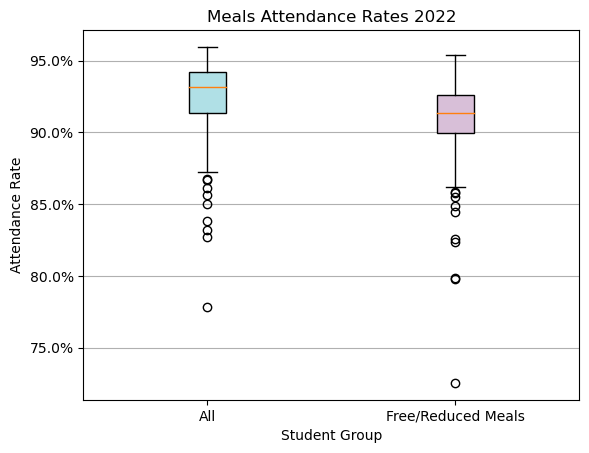

In [49]:
#Plot comparing f&r and all
labels = ["All", "Free/Reduced Meals"]
#Plot
x_axis = [rates_2022, rates_2022_fr]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["powderblue", "thistle"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Meals Attendance Rates 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/FRAllBoxPlot.png")
plt.show()

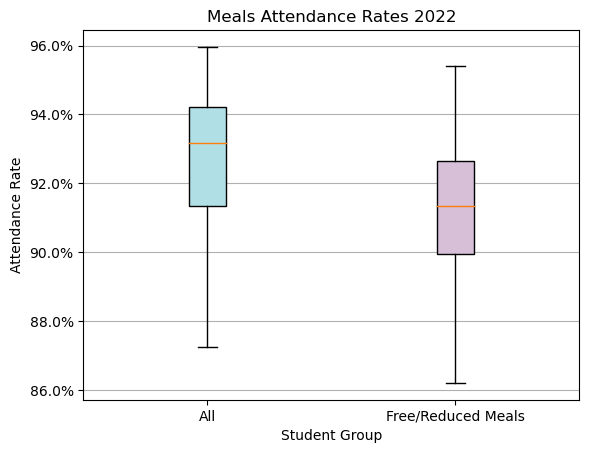

In [50]:
#Plot comparing f&r and all No Outliers
labels = ["All", "Free/Reduced Meals"]
#Plot
x_axis = [rates_2022, rates_2022_fr]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["powderblue", "thistle"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Meals Attendance Rates 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/FRAllNoOutBoxPlot.png")
plt.show()

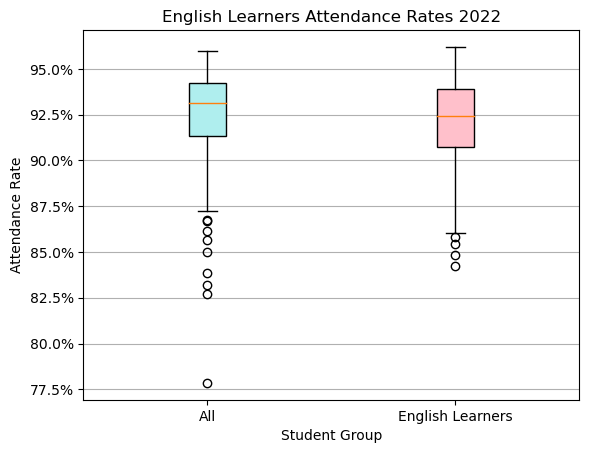

In [51]:
#Plot comparing ELL and all
labels = ["All", "English Learners"]
#Plot
x_axis = [rates_2022, rates_2022_ell]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["paleturquoise", "pink"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("English Learners Attendance Rates 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/ELLAllBoxPlot.png")
plt.show()

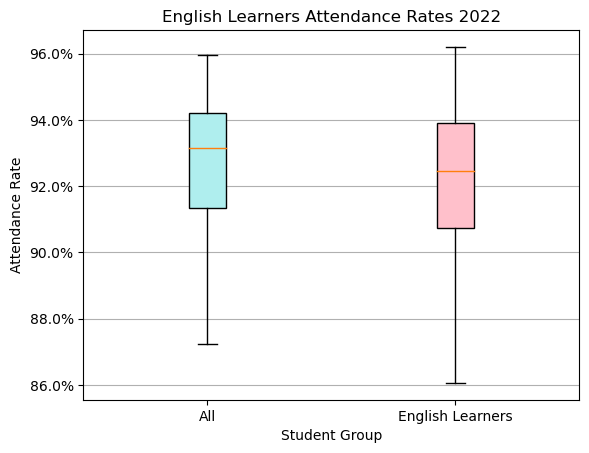

In [52]:
#Plot comparing ELL and all
labels = ["All", "English Learners"]
#Plot
x_axis = [rates_2022, rates_2022_ell]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["paleturquoise", "pink"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("English Learners Attendance Rates 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/ELLNoOutAllBoxPlot.png")
plt.show()

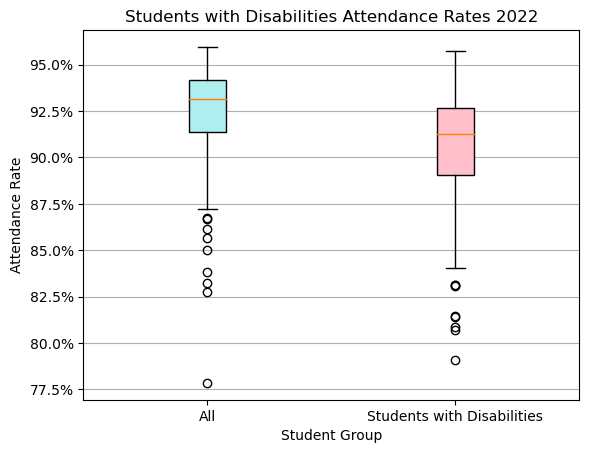

In [53]:
#Plot comparing ELL and all
labels = ["All", "Students with Disabilities"]
#Plot
x_axis = [rates_2022, rates_2022_dis]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["paleturquoise", "pink"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with Disabilities Attendance Rates 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/DisAllBoxPlot.png")
plt.show()

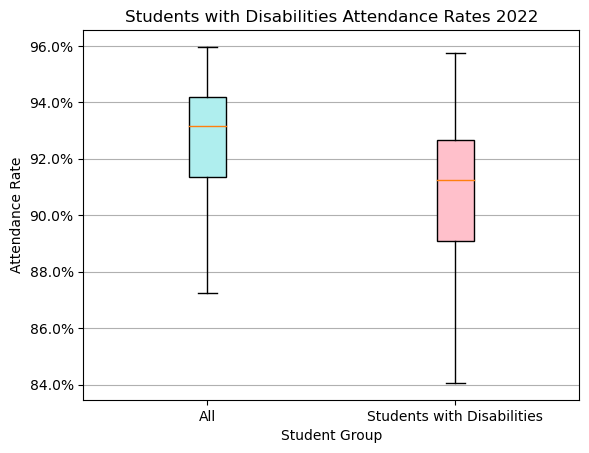

In [54]:
#Plot comparing ELL and all
labels = ["All", "Students with Disabilities"]
#Plot
x_axis = [rates_2022, rates_2022_dis]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["paleturquoise", "pink"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with Disabilities Attendance Rates 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/DisNoOutAllBoxPlot.png")
plt.show()

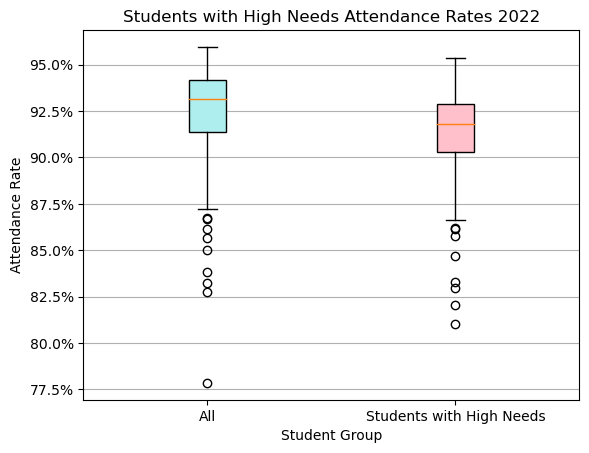

In [55]:
#Plot comparing ELL and all
labels = ["All", "Students with High Needs"]
#Plot
x_axis = [rates_2022, rates_2022_needs]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["paleturquoise", "pink"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with High Needs Attendance Rates 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/NeedsAllBoxPlot.png")
plt.show()

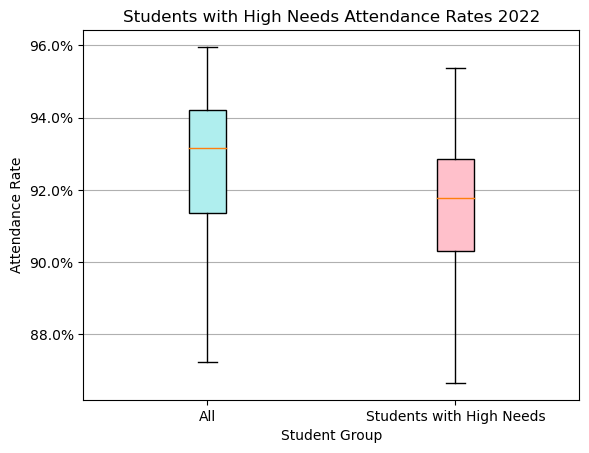

In [56]:
#Plot comparing ELL and all
labels = ["All", "Students with High Needs"]
#Plot
x_axis = [rates_2022, rates_2022_needs]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("Student Group")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["paleturquoise", "pink"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Students with High Needs Attendance Rates 2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/NeedsNoOutAllBoxPlot.png")
plt.show()

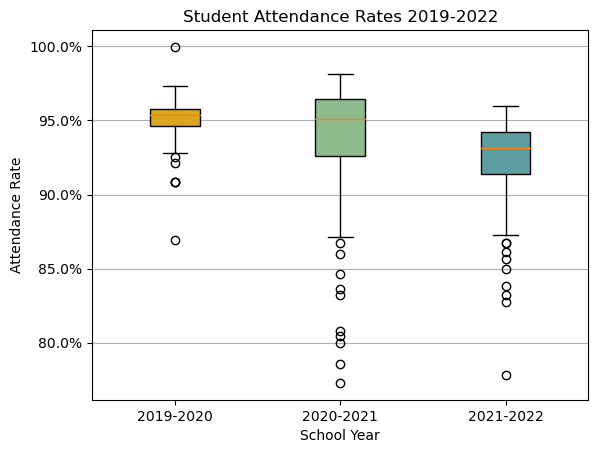

In [57]:
#Plot comparing All over years
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020, rates_2021, rates_2022]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels)

colors = ["goldenrod", "darkseagreen", "cadetblue"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/AttenAllBoxPlot.png")
plt.show()

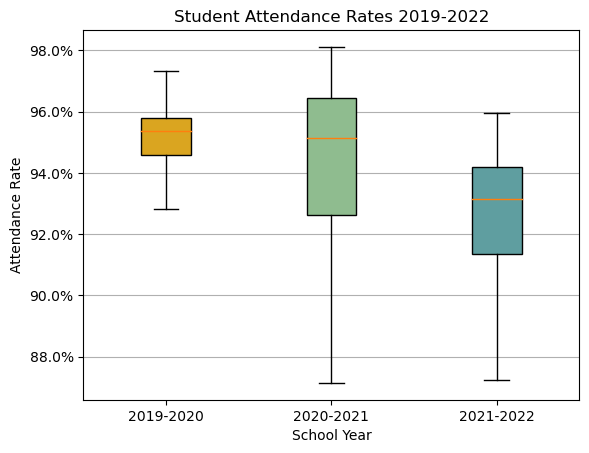

In [58]:
#Plot comparing All over years
labels = ["2019-2020", "2020-2021", "2021-2022"]
#Plot
x_axis = [rates_2020, rates_2021, rates_2022]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Attendance Rate")
ax1.set_xlabel("School Year")
bp_white = ax1.boxplot(x_axis, patch_artist = True, labels = labels, showfliers=False)

colors = ["goldenrod", "darkseagreen", "cadetblue"]
for patch, color in zip(bp_white['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_title("Student Attendance Rates 2019-2022")
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.savefig("Images/AttenAllNoOurBoxPlot.png")
plt.show()